# Python de cero a experto
**Autor:** Luis Miguel de la Cruz Salas

<a href="https://github.com/luiggix/Python_cero_a_experto">Python de cero a experto</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Matplotlib
Es una biblioteca de Python multiplataforma para generar gráficos (plots) en dos dimensiones con las características: 
* Se puede usar en una variedad de ámbitos:
    - Scripts de Python, Shells de IPython, Notebooks de Jupyter, Aplicaciones para Web e Interfaces Gráficas de Usuario (GUI). 
* Se puede usar para desarrollar aplicaciones profesionales.
* Puede generar varios tipos de formatos de figuras y videos:
    - png, jpg, svg, pdf, mp4, ...
* Tiene un soporte limitado para realizar figuras en 3D.
* Puede combinarse con otras bibliotecas y aplicaciones para extender su funcionalidad.

**Arquitectura** de tres capas:
* **Scripting**: API para crear gráficas.
    - Provee de una interfaz simple para crear gráficas.
    - Está orientada a usuarios sin mucha experiencia en la programación.
    - Es lo que se conoce como el API de pyplot.
* **Artist**: Hace el trabajo interno de creación de los elementos de la gráfica.
   - Los Artist (artesanos?) dibujan los elementos de la gráfica.
   - Cada elemento que se ve en la gráfica es un Artist.
   - Provee de un API orientado a objetos muy flexible.
   - Está orientado a programadores expertos para crear aplicaciones complejas.
* **Backend**: El lugar donde se despliega la gráfica. Las gráficas se envían a un dispositivo de salida. Puede ser cualquier interfaz que soporta Matplotlib:
   - User interface backends (interactive backends): pygtk, wxpython, tkinter, qt4, macosx, … 
   - Hard-copy backends (non-interactive backends): .png, .svg, .pdf, .ps

<img src="./Figuras/anatomy_001.png" style="width: 400px;"/>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Figure
- Representa a la figura completa. 
- Le da seguimiento a todos sus ejes hijos (*Axes*), un puñado de artistas especiales (*titles*, *figure legends*, etc.) y el lienzo (*canvas*).
- Una figura puede tener cualquier número de ejes (*Axes*), y siempre debe haber al menos uno.
- La forma más fácil de crear una figura es con `pyplot`.

In [ ]:
# Creación de una figura (pyplot)
fig = plt.figure()

### Axes
- Es la región de la imagen con el espacio para graficar los datos.
- Una figura puede contener muchos objetos de tipo *Axes*, pero un objeto *Axes* solo puede estar en una figura.
- Los objetos *Axes* contienen dos (o tres en 3D) objetos *Axis* los cuales se encargan de los límites de los datos.
- Cada objeto *Axes* tiene un título (`set_title())`, un *x-label* (`set_xlabel()`) y un *y-label* (`set_ylabel()`).
- La clase `Axes` y sus funciones miembro son el primer punto de entrada para trabajar con la interface Orientada a Objetos.

In [ ]:
# Obtiene los ejes (Axes) de la figura actual (get current axes)
# (pyplot)
plt.gca() 

In [ ]:
# Genera una subgráfica
# (pyplot)
fig, axes = plt.subplots(1)

In [ ]:
# Genera 6 subgráficas, arreglo de 2 renglones por tres columnas
# (pyplot)
fig, axes = plt.subplots(2,3)

### Axis
- Estos son objetos del tipo línea numerada. 
- Se encargan de configurar los límites de la gráfica y de generar las marcas sobre los ejes (*ticks*) y las etiquetas sobre esas marcas (*ticklabels*).
- El lugar donde se ponen esas marcas se determina por un objeto `Locator` y las cadenas de las etiquetas son formateadas por un objeto `Formatter`.
- La combinación de los objetos `Locator` y `Formatter` adecuados dan un control muy fino sobre el lugar de los *ticks* y sus *ticklabels*.


In [ ]:
# Generación de las etiquetas de los ejes, los ticks y los tickslabels.
#(pyplot)
fig = plt.figure(figsize=(10,5))
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(ticks=np.linspace(0,1,5), labels=['a', 'b', 'c', 'd', 'c'])
plt.yticks(ticks=np.linspace(0,1,2), labels=['A', 'B'])

### Artist
- Todo lo que se puede ver en la figura es un *Artist*: `Figure`, `Axes` y `Axis`, `Text`, `Line2D`, `collection`, `Patch`, etc.
- Cuando una figura es producida/generada, todos los *Artist* son dibujados sobre el canvas.
- La mayoría de los *Artist* están ligados a objetos de tipo `Axes`, esos *Artist* no se pueden compartir con múltiples `Axes`, ni se pueden mover a otros `Axes`.


In [ ]:
# Figura con una gráfica y varios Artist
# (pyplot)
x = np.linspace(0,2*np.pi,100)
y = np.sin(4*x)*np.exp(-x)
plt.figure()
plt.plot(x,y, label='$\sin(4 \pi x) e^{-x}$')
plt.suptitle('FIGURA') # título de la figura
plt.title('Onda amortiguada') # título de los ejes
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.legend()
plt.savefig('onda_amortiguada.pdf')
plt.show()

### Ejemplo 1.
Visualizar una imagen.

In [ ]:
import matplotlib.image as mpimg

In [ ]:
chapulin = mpimg.imread('Figuras/chapulin.jpg')

In [ ]:
print(chapulin)

In [ ]:
plt.imshow(chapulin)

In [ ]:
print(type(chapulin))

In [ ]:
canal1_chapulin = chapulin[:,:,2]

In [ ]:
plt.imshow(canal1_chapulin)

In [ ]:
plt.imshow(canal1_chapulin, cmap='hot')

In [ ]:
nueva = plt.imshow(canal1_chapulin, cmap='seismic')
plt.colorbar(nueva)

In [ ]:
h = plt.hist(canal1_chapulin.ravel(), bins=256)

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(chapulin)
ax.set_title('Before')
plt.colorbar(ticks=[0,100,200], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(canal1_chapulin, cmap='hot')
ax.set_title('After')
plt.colorbar(ticks=[0,100,200], orientation='horizontal')

### Ejemplo 2.
Dibujar las funciones $sin(x)$ , $cos(x)$ y puntos aleatorios en una sola gráfica en el dominio $(x,y) \in [0,2\pi] \times [-1,1]$.

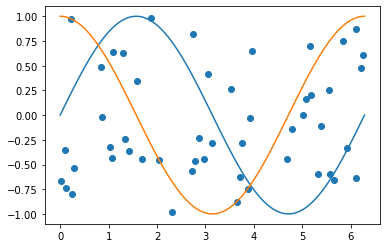

In [64]:
x = np.linspace(0,2*np.pi,100)
r = np.random.rand(2,50)
r[0] *= 2*np.pi
r[1] =  r[1] * 2 - 1

#r = np.random.rand(2,50) * np.array([2*np.pi, 2]).reshape(2,1) - np.array([0,1]).reshape(2,1)

y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, x, y2)
plt.scatter(r[0], r[1])

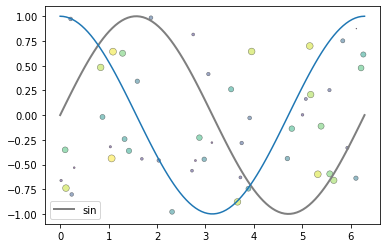

In [80]:
plt.plot(x, y1, lw = 2, c='C7', label='sin')
plt.plot(x, y2)
area = np.random.rand(50) * 50
plt.scatter(r[0], r[1], s=area, c=area, edgecolor='k', lw=0.5, alpha=0.5)
plt.legend()